## Constantes et modules

In [1]:
# Modules

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from collections import deque
import vpython as vp

# Constante gravitationnelle

g = 9.80665 # [m/s^2]

<IPython.core.display.Javascript object>

### 1. Démontrez comment on obtient la deuxième équation du mouvement ci-haut

Étant donné que le pendule est dans le plan $xy$, la vitesse de la masse $n$ est donnée par:

$$v_n=\sqrt{\dot{x}_n^2+\dot{y}_n^2}$$

On doit donc déterminer $x_2$ et $y_2$, les coordonnées de la masse 2. Or, puisque la masse 2 se trouve au bout du pendule, on obtient les coordonnées en additionnant les coordonnées de la masse 1 ($x_1$, $y_1$) aux coordonnées de la masse 2 *par rapport* à la masse 1 ($x_{21}$, $y_{21}$). Par trigonométrie (voir figure 1), on trouve les expressions suivantes:

$$x_1=\ell \sin\theta_1$$
$$y_1=\ell \cos\theta_1$$

$$x_{21}=\ell \sin\theta_2$$
$$y_{21}=\ell \cos\theta_2$$

Et on obtient les coordonnées suivantes pour la masse 2:

$$x_2=x_1+x_{21}=\ell(\sin\theta_1+\sin\theta_2)$$
$$y_2=y_1+y_{21}=\ell(\cos\theta_1+\cos\theta_2)$$

On dérive par rapport au temps les expressions obtenues en se souvenant que $\ell$ est une constante et que $\theta_1$, $\theta_2$ varient:

$$\dot{x}_2=\ell(\dot{\theta}_1\cos\theta_1+\dot{\theta}_2\cos\theta_2)$$
$$\dot{y}_2=-\ell(\dot{\theta}_1\sin\theta_1+\dot{\theta}_2\sin\theta_2)$$

On met au carré:

$$\dot{x}_2^2=\ell^2(\dot{\theta}_1^2\cos^2\theta_1+\dot{\theta}_2^2\cos^2\theta_2+2\dot{\theta}_1\dot{\theta}_2\cos\theta_1\cos\theta_2)$$
$$\dot{y}_2^2=\ell^2(\dot{\theta}_1^2\sin^2\theta_1+\dot{\theta}_2^2\sin^2\theta_2+2\dot{\theta}_1\dot{\theta}_2\sin\theta_1\sin\theta_2)$$

Et on obtient la vitesse en additionnant les deux expressions:

$$v_2^2=\dot{x}_2^2+\dot{y}_2^2$$

$$v_2^2=\ell^2(\dot{\theta}_1^2\cos^2\theta_1+\dot{\theta}_2^2\cos^2\theta_2+2\dot{\theta_1}\dot{\theta_2}\cos\theta_1\cos\theta_2)+\ell^2(\dot{\theta}_1^2\sin^2\theta_1+\dot{\theta}_2^2\sin^2\theta_2+2\dot{\theta}_1\dot{\theta}_2\sin\theta_1\sin\theta_2)$$

$$v_2^2=\ell^2(\dot{\theta}_1^2(\sin^2\theta_1+\cos^2\theta_1)+\dot{\theta}_2(^2\sin^2\theta_2+\cos^2\theta_2)+2\dot{\theta}_1\dot{\theta}_2(\cos\theta_1\cos\theta_2+\sin\theta_1\sin\theta_2))$$

On simplifie avec les identités $\sin^2\alpha+\cos^2\alpha=1$ et $\cos\alpha\cos\beta+\sin\alpha\sin\beta=\cos(\alpha-\beta)$:

$$v_2^2=\ell^2(\dot{\theta}_1^2+\dot{\theta}_2^2+2\dot{\theta}_1\dot{\theta}_2\cos(\theta_1-\theta_2))$$

C.Q.F.D.

### 2. Démontrez comment on obtient la forme ci-haut

On a les deux équations suivantes:

$$2\dot{\omega}_1+\dot{\omega}_2\cos(\theta_1-\theta_2)+\omega_2^2\sin(\theta_1-\theta_2)+2\frac{g}{\ell}\sin\theta_1=0$$
$$\dot{\omega}_2+\dot{\omega}_1\cos(\theta_1-\theta_2)-\omega_1^2\sin(\theta_1-\theta_2)+\frac{g}{\ell}\sin\theta_2=0$$

On isole $\dot{\omega}_2$ dans chaque équation:

$$\dot{\omega}_2=\frac{-2\dot{\omega}_1-\omega_2^2\sin(\theta_1-\theta_2)-2\frac{g}{\ell}\sin\theta_1}{\cos(\theta_1-\theta_2)}$$
$$\dot{\omega}_2=-\dot{\omega}_1\cos(\theta_1-\theta_2)+\omega_1^2\sin(\theta_1-\theta_2)-\frac{g}{\ell}\sin\theta_2$$

On égalise les deux équations:

$$\frac{-2\dot{\omega}_1-\omega_2^2\sin(\theta_1-\theta_2)-2\frac{g}{\ell}\sin\theta_1}{\cos(\theta_1-\theta_2)}=-\dot{\omega}_1\cos(\theta_1-\theta_2)+\omega_1^2\sin(\theta_1-\theta_2)-\frac{g}{\ell}\sin\theta_2$$

On multiplie des deux côtés par $\cos(\theta_1-\theta_2)$:

$$-2\dot{\omega}_1-\omega_2^2\sin(\theta_1-\theta_2)-2\frac{g}{\ell}\sin\theta_1=-\dot{\omega}_1\cos(\theta_1-\theta_2)\cos(\theta_1-\theta_2)+\omega_1^2\sin(\theta_1-\theta_2)\cos(\theta_1-\theta_2)-\frac{g}{\ell}\sin\theta_2\cos(\theta_1-\theta_2)$$

On simplifie avec les identités $\cos A\cos B = \frac{1}{2}(\cos(A-B)+\cos(A+B))$ et $\sin A \cos B = \frac{1}{2}(\sin(A-B)+\sin(A+B))$:

$$-2\dot{\omega}_1-\omega_2^2\sin(\theta_1-\theta_2)-2\frac{g}{\ell}\sin\theta_1=-\dot{\omega}_1\frac{1}{2}(\cos(0)+\cos(2\theta_1-2\theta_2))+\omega_1^2\frac{1}{2}(\sin(0)+\sin(2\theta_1-2\theta_2))-\frac{g}{\ell}\frac{1}{2}(\sin(2\theta_2-\theta_1)+\sin(\theta_1))$$

On simplifie $\cos(0)=1$ et $\sin(0)=0$ et on multiplie par 2:

$$-4\dot{\omega}_1-2\omega_2^2\sin(\theta_1-\theta_2)-4\frac{g}{\ell}\sin\theta_1=-\dot{\omega}_1(1+\cos(2\theta_1-2\theta_2))+\omega_1^2\sin(2\theta_1-2\theta_2)-\frac{g}{\ell}(\sin(2\theta_2-\theta_1)+\sin(\theta_1))$$

On isole les termes avec $\dot{\omega}_1$:

$$\dot{\omega}_1(1+\cos(2\theta_1-2\theta_2)-4)=\omega_1^2\sin(2\theta_1-2\theta_2)-\frac{g}{\ell}(\sin(2\theta_2-\theta_1)+\sin(\theta_1))+2\omega_2^2\sin(\theta_1-\theta_2)+4\frac{g}{\ell}\sin\theta_1$$

$$\dot{\omega}_1(\cos(2\theta_1-2\theta_2)-3)=\omega_1^2\sin(2\theta_1-2\theta_2)+2\omega_2^2\sin(\theta_1-\theta_2)-\frac{g}{\ell}(\sin(2\theta_2-\theta_1)-3\sin\theta_1)$$

On réarrange le dernier terme avec $\sin(-A)=-\sin A$:

$$\dot{\omega}_1(\cos(2\theta_1-2\theta_2)-3)=\omega_1^2\sin(2\theta_1-2\theta_2)+2\omega_2^2\sin(\theta_1-\theta_2)+\frac{g}{\ell}(\sin(\theta_1-2\theta_2)+3\sin\theta_1)$$

On isole $\dot{\omega}_1$ et on inverse le signe du dénominateur du côté droit:

$$\dot{\omega}_1=-\frac{\omega_1^2\sin(2\theta_1-2\theta_2)+2\omega_2^2\sin(\theta_1-\theta_2)+\frac{g}{\ell}(\sin(\theta_1-2\theta_2)+3\sin\theta_1)}{3-\cos(2\theta_1-2\theta_2)}$$

Qui est la forme recherchée pour la première équation. 

<!-- Pour obtenir la seconde, on isole $\dot{\omega}_1$ dans la première forme donnée:

$$\dot{\omega}_1=\frac{1}{2}(-\dot{\omega}_2\cos(\theta_1-\theta_2)-\omega_2^2\sin(\theta_1-\theta_2)-2\frac{g}{\ell}\sin\theta_1)$$

Et on égalise avec l'équation de $\dot{\omega}_1$ que nous venons de trouver (on multiplie aussi chaque côté par -2):

$$\dot{\omega}_2\cos(\theta_1-\theta_2)+\omega_2^2\sin(\theta_1-\theta_2)+2\frac{g}{\ell}\sin\theta_1=\frac{2\omega_1^2\sin(2\theta_1-2\theta_2)+4\omega_2^2\sin(\theta_1-\theta_2)+2\frac{g}{\ell}(\sin(\theta_1-2\theta_2)+3\sin\theta_1)}{3-\cos(2\theta_1-2\theta_2)}$$

On isole $\dot{\omega}_2$:

$$\dot{\omega}_2\cos(\theta_1-\theta_2)=\frac{2\omega_1^2\sin(2\theta_1-2\theta_2)+4\omega_2^2\sin(\theta_1-\theta_2)+2\frac{g}{\ell}(\sin(\theta_1-2\theta_2)+3\sin\theta_1)}{3-\cos(2\theta_1-2\theta_2)}-2\frac{g}{\ell}\sin\theta_1-\omega_2^2\sin(\theta_1-\theta_2)$$

On met les deux derniers termes du côté droit sur le même dénominateur que le premier en utilisant les mêmes identités trigonométriques que plus haut: -->

Pour obtenir la seconde équation, on répète la même démarche, mais cette fois en isolant $\dot{\omega}_1$ dans chaque équation initiale:

$$2\dot{\omega}_1+\dot{\omega}_2\cos(\theta_1-\theta_2)+\omega_2^2\sin(\theta_1-\theta_2)+2\frac{g}{\ell}\sin\theta_1=0$$
$$\dot{\omega}_2+\dot{\omega}_1\cos(\theta_1-\theta_2)-\omega_1^2\sin(\theta_1-\theta_2)+\frac{g}{\ell}\sin\theta_2=0$$

$$-\dot{\omega}_1=\frac{1}{2}\dot{\omega}_2\cos(\theta_1-\theta_2)+\frac{1}{2}\omega_2^2\sin(\theta_1-\theta_2)+\frac{g}{\ell}\sin\theta_1$$

$$-\dot{\omega}_1=\frac{\dot{\omega}_2-\omega_1^2\sin(\theta_1-\theta_2)+\frac{g}{\ell}\sin\theta_2}{\cos(\theta_1-\theta_2)}$$

On égalise les deux équations:

$$\frac{1}{2}\dot{\omega}_2\cos(\theta_1-\theta_2)+\frac{1}{2}\omega_2^2\sin(\theta_1-\theta_2)+\frac{g}{\ell}\sin\theta_1=\frac{\dot{\omega}_2-\omega_1^2\sin(\theta_1-\theta_2)+\frac{g}{\ell}\sin\theta_2}{\cos(\theta_1-\theta_2)}$$

On multiplie de chaque côté par $\cos(\theta_1-\theta_2)$:

$$\frac{1}{2}\dot{\omega}_2\cos(\theta_1-\theta_2)\cos(\theta_1-\theta_2)+\frac{1}{2}\omega_2^2\sin(\theta_1-\theta_2)\cos(\theta_1-\theta_2)+\frac{g}{\ell}\sin\theta_1\cos(\theta_1-\theta_2)=\dot{\omega}_2-\omega_1^2\sin(\theta_1-\theta_2)+\frac{g}{\ell}\sin\theta_2$$

On simplifie avec $\cos A\cos B = \frac{1}{2}(\cos(A-B)+\cos(A+B))$ et $\sin A\cos B=\frac{1}{2}(\sin(A-B)+\sin(A+B))$:

$$\frac{1}{4}\dot{\omega}_2(\cos(0)+\cos(2\theta_1-2\theta_2))+\frac{1}{4}\omega_2^2(\sin(0)+\sin(2\theta_1-2\theta_2))+\frac{g}{2\ell}(\sin\theta_2+\sin(2\theta_1-\theta_2))=\dot{\omega}_2-\omega_1^2\sin(\theta_1-\theta_2)+\frac{g}{\ell}\sin\theta_2$$

On remplace $\cos 0 =1$ et $\sin 0 =0$ et on multiplie par 4:

$$\dot{\omega}_2(1+\cos(2\theta_1-2\theta_2))+\omega_2^2\sin(2\theta_1-2\theta_2)+2\frac{g}{\ell}(\sin\theta_2+\sin(2\theta_1-\theta_2))=4\dot{\omega}_2-4\omega_1^2\sin(\theta_1-\theta_2)+4\frac{g}{\ell}\sin\theta_2$$

On isole $\dot{\omega}_2$:

$$\dot{\omega}_2(\cos(2\theta_1-2\theta_2)-3)=-4\omega_1^2\sin(\theta_1-\theta_2)+4\frac{g}{\ell}\sin\theta_2-\omega_2^2\sin(2\theta_1-2\theta_2)-2\frac{g}{\ell}(\sin\theta_2+\sin(2\theta_1-\theta_2))$$

$$\dot{\omega}_2=\frac{-4\omega_1^2\sin(\theta_1-\theta_2)+4\frac{g}{\ell}\sin\theta_2-\omega_2^2\sin(2\theta_1-2\theta_2)-2\frac{g}{\ell}(\sin\theta_2+\sin(2\theta_1-\theta_2))}{(\cos(2\theta_1-2\theta_2)-3)}$$

$$\dot{\omega}_2=\frac{-4\omega_1^2\sin(\theta_1-\theta_2)-\omega_2^2\sin(2\theta_1-2\theta_2)-2\frac{g}{\ell}(-\sin\theta_2+\sin(2\theta_1-\theta_2))}{(\cos(2\theta_1-2\theta_2)-3)}$$

On élimine un facteur $-1$ du numérateur et du dénominateur:

$$\dot{\omega}_2=\frac{4\omega_1^2\sin(\theta_1-\theta_2)+\omega_2^2\sin(2\theta_1-2\theta_2)+2\frac{g}{\ell}(\sin(2\theta_1-\theta_2)-\sin\theta_2)}{3-\cos(2\theta_1-2\theta_2)}$$

C.Q.F.D.

## Question 3

On veut maintenant déterminer l'énergie totale du système. On sait que l'énergie potentielle du pendule double est donnée par :
$$V = -mgl(2\cos\theta_1 + \cos\theta_2)$$
L'énergie cinétique du système est donnée par :
$$T = ml^2\bigg[\dot{\theta}_1^2 + \frac{1}{2}\dot{\theta}_2^2 + \dot{\theta}_1\dot{\theta}_2\cos(\theta_1 - \theta_2)\bigg]$$
On remplace $\dot{\theta}_1$ et $\dot{\theta}_2$ par $\omega_1$ et $\omega_1$ :
$$T = ml^2\bigg[\omega_1^2 + \frac{1}{2}\omega_2^2 + \omega_1\omega_2\cos(\theta_1 - \theta_2)\bigg]$$
On peut donc facilement déterminer l'énergie totale du système :
$$E = T + V$$
$$E = ml^2\bigg[\omega_1^2 + \frac{1}{2}\omega_2^2 + \omega_1\omega_2\cos(\theta_1 - \theta_2)\bigg] - mgl(2\cos\theta_1 + \cos\theta_2)$$

Comme on ne considère pas de friction dans le système, l'énergie totale devrait être constante en tout temps. Toutefois, à cause des différentes méthodes numériques que nous allons utiliser, cette grandeur variera légèrement. À partir de maintenant, on considérera qu'une variation d'énergie de moins de $10^{-5}$ J est négligeable. La précision des méthodes numériques que nous utiliserons devront donc comporter une erreur qui cause une variation au-dessous de ce seuil. Cette valeur sert donc de critère de précision pour les méthodes utilisées.

## Question 4

#### 4.1 Méthode Runge-Kutta

On veut maintenant résoudre les équations du mouvement du pendule. Pour ce faire, on souhaite implémenter une méthode numérique de résolution d'équations différentielles ordinaires d'ordre 1. On choisit la méthode de Runge-Kutta d'ordre 4, car celle-ci permet d'obtenir une grande précision tout en restant simple à implémenter. On commence donc par coder la fonction *runge_kutta_4* qui prend en argument une fonction *f* représentant l'expression de $\frac{\text{d}x}{\text{d}t}$ où $x(t)$ est la solution de l'équation différentielle, la valeur initiale $x_0$ de la fonction au début de l'intervalle d'intérêt, l'intervalle $a,\ b$ où on veut connaître la fonction $x(t)$ et un nombre $N$ correspondant au nombre de tranches souhaité dans l'intervalle. La fonction *runge_kutta_4* utilise ensuite la méthode Runge-Kutta d'ordre 4 [1] pour déterminer $x(t)$. Elle retourne ensuite *t* et *x*, qui sont respectivement un *array numpy* à une dimension comprenant les valeurs de temps et une liste comprenant les valeurs de $x(t)$ sur l'intervalle de *a* à *b*.

In [2]:
# Implémentation de la méthode Runge-Kutta de quatrième ordre
# Arguments :
# f : fonction f(x, t) représentant l'expression de la première dérivée de x
# x_0 : valeur initiale x(a) de la fonction au début de l'intervalle
# a, b : intervalle où on veut connaître x
# N : nombre de tranches souhaité dans l'intervalle a, b
# Retourne :
# x : liste des valeurs de la fonction x(t)
# t : array 1D des valeurs de temps

def runge_kutta_4(f, x_0, a, b, N):
    t = np.linspace(a, b, N)
    x = [x_0]
    # calcul du pas h
    h = (b - a) / N
    for i in range(len(t)):
        # grandeurs k_1, k_2, k_3, k_4 propres à Runge-Kutta de 4e ordre
        k_1 = h * f(x[i], t[i])
        k_2 = h * f(x[i] + k_1/2, t[i] + h/2)
        k_3 = h * f(x[i] + k_2/2, t[i] + h/2)
        k_4 = h * f(x[i] + k_3, t[i] + h)
        # calcul de la prochaine valeur de x
        x.append(x[i] + (k_1 + 2*k_2 + 2*k_3 + k_4) / 6)
    return x, t

#### 4.2 Équations du mouvement

On veut maintenant coder les équations du mouvement. Le pendule double comporte 4 équations du mouvement, qui sont données plus haut. Pour résoudre un système d'équations différentielles à plusieurs variables, on peut utiliser la fonction *runge-kutta_4* en lui passant une fonction *f* qui prend en argument une liste *x* comprenant les valeurs des 4 variables et une valeur de *t*. Dans notre cas, on nomme cette fonction *equations_penddouble* et celle-ci prend en argument une liste *x* qui comprend les valeurs de $\theta_1$, $\theta_2$, $\omega_1$ et $\omega_2$ et une valeur de temps *t*. Celle-ci utilise alors les 4 équations du mouvement pour construire la liste *dot_x* qui comprend les valeurs de $\dot{\theta}_1$, $\dot{\theta}_2$, $\dot{\omega}_1$ et $\dot{\omega}_2$. la fonction retourne ensuite *array_dot_x*, qui correspond à *dot_x* convertie en *array*. On considère ici que les tiges des pendules sont de longueur $l=40$ cm.

In [3]:
# Équations du mouvement du pendule double
# Arguments :
# x : liste comprenant les valeurs de theta_1 [rad], theta_2 [rad], omega_1 [rad/s], omega_2 [rad/s] (dans cet ordre)
# t : valeur de temps [s] (non-utilisée, mais doit être présente pour la compatibilité avec runge_kutta_4)
# Retourne :
# array_dot_x : array 1D comprenant les dérivées temporelles des 4 variables dépendantes (même ordre et mêmes unités que x)

def equations_penddouble(x, t):
    # on renomme les variables pour simplifier la notation
    t1 = x[0]
    t2 = x[1]
    o1 = x[2]
    o2 = x[3]
    # on définit la longueur de 40 cm
    l = 0.40
    # on crée la liste des dérivées
    dot_x = []
    # dérivées de theta_1 et theta_2
    dot_x.append(o1)
    dot_x.append(o2)
    # dérivées de omega_1 et omega_2
    dot_omega_1 = -(o1**2 * np.sin(2*t1-2*t2) + 2*o2**2*np.sin(t1-t2) + g/l * (np.sin(t1-2*t2) + 3*np.sin(t1))) / (3-np.cos(2*t1-2*t2))
    dot_omega_2 = (4*o1**2 * np.sin(t1-t2) + o2**2*np.sin(2*t1-2*t2) + 2*g/l * (np.sin(2*t1-t2) - np.sin(t2))) / (3-np.cos(2*t1-2*t2))
    dot_x.append(dot_omega_1)
    dot_x.append(dot_omega_2)
    return np.array(dot_x)

#### 4.3 Résolution des équations du mouvement

On peut maintenant utiliser la méthode *runge_kutta_4* et la fonction *equations_penddouble* pour résoudre les équations du mouvement selon la méthode de Runge-Kutta d'ordre 4'. On considère les conditions initiales suivantes : $\theta_1 = \theta_2 = 90$°, $\omega_1=\omega_2=0$. On s'intéresse au comportement du pendule de $t=0$ à $t=100$ s avec $N=100\ 000$ tranches. On trace ensuite les positions angulaires $\theta_1$ et $\theta_2$ sur l'intervalle d'intérêt.

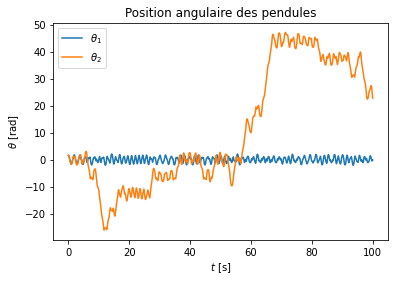

In [4]:
# définition des conditions initiales (en radians)
cond_init = [np.pi/2, np.pi/2, 0, 0]

# résolution des équations du mouvement
result, t = runge_kutta_4(equations_penddouble, cond_init, 0, 100, 100000)

# on trace le résultat

theta_1 = []
for v in result:
    theta_1.append(v[0])

theta_2 = []
for v in result:
    theta_2.append(v[1])

fig = plt.figure()
fig.patch.set_facecolor('white')
plt.title('Position angulaire des pendules')
plt.ylabel('$θ$ [rad]')
plt.xlabel('$t$ [s]')
plt.plot(t, theta_1[:-1], label="$θ_1$")
plt.plot(t, theta_2[:-1], label="$θ_2$")
plt.legend()
plt.show()

On remarque que le pendule semble faire plus de tours complets que le pendule 1, car sa position angulaire varie sur un plus grand intervalle. Toutefois, comme le pendule double est un système chaotique, il comporte une très grande sensibilité aux conditions initiales et à la valeur numérique des constantes. Pour montrer cette caractéristique du système, on peut refaire la résolution des équations du mouvement en arrondissant la valeur de *g* définie au début du document.

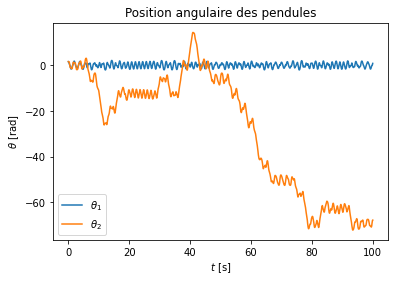

In [5]:
# on redéfinit la valeur de g
g = 9.8 # [m/s^2]

# définition des conditions initiales (en radians)
cond_init = [np.pi/2, np.pi/2, 0, 0]

# résolution des équations du mouvement
result_2, t_2 = runge_kutta_4(equations_penddouble, cond_init, 0, 100, 100000)

# on trace le résultat

theta_1_2 = []
for v in result_2:
    theta_1_2.append(v[0])

theta_2_2 = []
for v in result_2:
    theta_2_2.append(v[1])

fig2 = plt.figure()
fig2.patch.set_facecolor('white')
plt.title('Position angulaire des pendules')
plt.ylabel('$θ$ [rad]')
plt.xlabel('$t$ [s]')
plt.plot(t_2, theta_1_2[:-1], label="$θ_1$")
plt.plot(t_2, theta_2_2[:-1], label="$θ_2$")
plt.legend()
plt.show()

# on redéfinit la valeur initiale de g
g = 9.80665 # [m/s^2]

On observe que le comportement du pendule 2 change radicalement après environ 20 s par rapport à la valeur initiale de *g*. Les résultats prédits ici ont donc une portée limitée, car de nombreux facteurs peuvent les faire varier de façon importante.

## Question 5

On veut maintenant observer comment varie l'énergie totale du système selon le comportement trouvé à la question 4. Pour ce faire, on crée la fonction *energie_tot*, qui prend en argument une liste *x* comprenant les valeurs des 4 variables indépendantes. Elle retourne ensuite l'énergie totale du système en Joules en la calculant selon l'équation déterminée à l'équation 3. On considère une masse $m=1$ kg, donc celle-ci disparaît de l'équation.

In [6]:
# Énergie totale du système
# Arguments :
# x : liste des valeurs de theta_1, theta_2, omega_1, omega_2 en [rad] et [rad/s]
# Retourne :
# E : énergie totale du système [J]

def energie_tot(x):
    # on renomme les variables pour simplifier la notation
    t1 = x[0]
    t2 = x[1]
    o1 = x[2]
    o2 = x[3]
    # longueur de la tige à 40 cm
    l = 0.40
    # calcul de l'énergie
    E = l**2 * (o1**2 + o2**2/2 + o1*o2*np.cos(t1-t2)) - g*l*(2*np.cos(t1) + np.cos(t2))
    return E

On utilise maintenant notre nouvelle fonction pour calculer et représenter graphiquement l'énergie totale du pendule de $t=0$ à $t=100$ s. On calcule également la variation entre les valeurs d'énergie maximale et minimale.

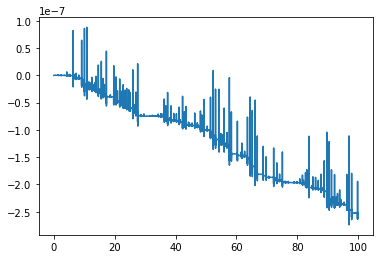

La plus grande variation d'énergie est de 3.624234707899632e-07 J.


In [7]:
# Calcul de l'énergie de 0 à 100 s
energie = []
for x in result:
    energie.append(energie_tot(x))

# représentation graphique
fig3 = plt.figure()
fig3.patch.set_facecolor('white')
plt.plot(t, energie[:-1])
plt.show()

# différence entre max et min
var_energie = max(energie) - min(energie)
print("La plus grande variation d'énergie est de", var_energie, "J.")

La variation d'énergie est inférieure au seuil de $10^{-5}$ J que nous avions défini. La méthode Runge-Kutta d'ordre 4 avec 10 000 tranches atteint donc la précision souhaitée pour résoudre les équations du mouvement du pendule double.

Toutefois, la méthode de Runge-Kutta d'ordre 4 est clairement non-symplectique, car l'énergie totale n'est pas réellement conservée dans la solution que nous avons obtenue. Si on omet les variations rapides d'une itération à l'autre, on remarque une tendance générale qui semble être une décroissance linéaire. Comme l'énergie devrait en théorie être conservée, on peut donc déduire que la solution donnée par la méthode de Runge-Kutta devient de moins en moins exacte lorsqu'on s'éloigne du point de départ (ici $t=0$). Cette charactéristique est généralement propre aux méthodes non-symplectiques.

### 6.

On souhaite animer les données obtenues pour $\theta_1$ et $\theta_2$. On peut réutiliser les données calculées par la méthode RK4 plus haut, soit les variables *theta_1* et *theta_2*. On peut écrire une courte fonction qui sélectionne les points à intervalle de $N$ points:

On peut ainsi générer une liste de points à afficher pour ne pas avoir à afficher tous les points calculés, ce qui n'est pas nécessaire étant donné qu'on peut apprécier la dynamique avec un nombre plus restreint de points afin de réduire le temps d'éxécution. Pour l'animation, nous nous sommes référés à la section 3.5 du Newman [2] ainsi qu'à la documentation du package VPython [3]. À noter que le package VPython fonctionne difficilement dans VSCode; nous avons donc testé les animations dans un Notebook Jupyter dans un navigateur, où elles fonctionnaient sans problème.

In [8]:
# BUT: Afficher l'animation du pendule double
# Arguments:
# N: Intervalle auquel on conserve les points pour le temps et la solution
# theta_1, theta_2: listes des angles (solution de RK4)
# t: liste de temps (aussi fournie par la fonction RK4)

def animation(N, theta_1, theta_2, t):

    theta_1, theta_2, t = theta_1[::N], theta_2[::N], t[::N]

    scene = vp.canvas(title="Pendule double")

    tige1 = vp.cylinder(pos=vp.vector(0,0,0), axis=vp.vector(40,0,0), radius=0.5)
    tige2 = vp.cylinder(pos=vp.vector(40,0,0), axis=vp.vector(40,0,0), radius=0.5)

    masse1 = vp.sphere(pos=vp.vector(40,0,0), radius=2)
    masse2 = vp.sphere(pos=vp.vector(80,0,0), radius=2)

    for n in range(len(theta_1)-1):
        
        # Puisqu'on a pris 100 000 points pour RK4 et qu'il y a 100 secondes, on divise 1000 par N pour obtenir le nombre de points qu'on doit afficher par seconde
        vp.rate(1000/N)

        scene.caption = f"Temps: {t[n]:.2f} secondes"
        
        theta1 = theta_1[n]
        theta2 = theta_2[n]

        x1 = 40*np.sin(theta1)
        y1 = -40*np.cos(theta1)
        
        x12 = 40*np.sin(theta2)
        y12 = -40*np.cos(theta2)

        x2 = x1 + x12
        y2 = y1 + y12
        
        tige1.axis = vp.vector(x1,y1,0)
        tige2.pos = vp.vector(x1,y1,0)
        tige2.axis = vp.vector(x12,y12,0)
        
        masse1.pos = vp.vector(x1,y1,0)
        masse2.pos = vp.vector(x2,y2,0)


animation(1, theta_1, theta_2, t)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

On peut ajuster l'intervalle $N$ de façon à garder un nombre plus ou moins élevé de données, mais nous avons jugé que de toutes les garder ($N=1$) fonctionnait bien pour la fluidité de l'animation et pour bien apprécier la dynamique du système. La fonction a été codée de façon à ce qu'une seconde en temps réel équivale à une seconde de la solution, mais on peut modifier le ratio $1000/N$ si on souhaite modifier la vitesse de l'animation.

Pour mieux apprécier nos résultats de plus tôt sur la divergence du mouvement des deux pendules doubles autour de 20 secondes lorsqu'on change la gravité, on peut aussi faire une animation avec le pendule double "normal" (en blanc) et le pendule double avec la gravité arrondie (en rouge).

In [9]:
# BUT: Afficher l'animation des deux pendules doubles
# Arguments:
# N: Intervalle auquel on conserve les points pour le temps et la solution
# theta_1, theta_2: listes des angles pour le pendule "normal" (solution de RK4)
# phi_1, phi_2: listes des angles pour le pendule modifié (solution de RK4)
# t: liste de temps (aussi fournie par la fonction RK4)


def animation(N, theta_1, theta_2, phi_1, phi_2, t):

    theta_1, theta_2, t = theta_1[::N], theta_2[::N], t[::N]
    phi_1, phi_2 = phi_1[::N], phi_2[::N]
    
    scene = vp.canvas(title="Deux pendules doubles")

    tige1 = vp.cylinder(pos=vp.vector(0,0,0), axis=vp.vector(40,0,0), radius=0.5)
    tige2 = vp.cylinder(pos=vp.vector(40,0,0), axis=vp.vector(40,0,0), radius=0.5)

    masse1 = vp.sphere(pos=vp.vector(40,0,0), radius=2)
    masse2 = vp.sphere(pos=vp.vector(80,0,0), radius=2)
    
    tige3 = vp.cylinder(pos=vp.vector(0,0,0), axis=vp.vector(40,0,0), radius=0.5, color=vp.vector(1,0,0))
    tige4 = vp.cylinder(pos=vp.vector(40,0,0), axis=vp.vector(40,0,0), radius=0.5, color=vp.vector(1,0,0))

    masse3 = vp.sphere(pos=vp.vector(40,0,0), radius=2, color=vp.vector(1,0,0))
    masse4 = vp.sphere(pos=vp.vector(80,0,0), radius=2, color=vp.vector(1,0,0))

    for n in range(len(t)-1):
        
        vp.rate(1000)
        
        scene.caption = f"Temps: {t[n]:.2f} secondes"
        
        theta1 = theta_1[n]
        theta2 = theta_2[n]
        
        phi1 = phi_1[n]
        phi2 = phi_2[n]

        x1 = 40*np.sin(theta1)
        y1 = -40*np.cos(theta1)
        
        x12 = 40*np.sin(theta2)
        y12 = -40*np.cos(theta2)

        x2 = x1 + x12
        y2 = y1 + y12
        
        x3 = 40*np.sin(phi1)
        y3 = -40*np.cos(phi1)
        
        x34 = 40*np.sin(phi2)
        y34 = -40*np.cos(phi2)

        x4 = x3 + x34
        y4 = y3 + y34
        
        tige1.axis = vp.vector(x1,y1,0)
        tige2.pos = vp.vector(x1,y1,0)
        tige2.axis = vp.vector(x12,y12,0)
        
        masse1.pos = vp.vector(x1,y1,0)
        masse2.pos = vp.vector(x2,y2,0)
        
        tige3.axis = vp.vector(x3,y3,0)
        tige4.pos = vp.vector(x3,y3,0)
        tige4.axis = vp.vector(x34,y34,0)
        
        masse3.pos = vp.vector(x3,y3,0)
        masse4.pos = vp.vector(x4,y4,0)


animation(1, theta_1, theta_2, theta_1_2, theta_2_2, t)



<IPython.core.display.Javascript object>

Si on souhaite optimiser le programme, on peut faire en sorte que l'animation se fasse au fur et à mesure que les données sont calculées par RK4. De cette façon on aura pas besoin de générer les données, puis de générer l'animation: on pourra simplement lancer une fonction qui résoudra les équations et qui fera l'animation (on peut aussi tenter de réduire les fonctions d'affichage d'animation précédentes, qui sont détaillées pour des raisons de lisibilité mais qui pourraient être beaucoup réduites):

In [13]:
# BUT: Calculer les solutions aux équations différentielles pendant l'animation du pendule
# Arguments:
# f: équations à résoudre
# x_0: valeur initiale x(a) de la fonction au début de l'intervalle
# a, b : intervalle où on veut connaître x
# N : nombre de tranches souhaité dans l'intervalle a, b

def RK4_et_animation(f, x_0, a, b, N):

    # Définition des éléments de l'animation

    scene = vp.canvas(title="Pendule double")

    tige1 = vp.cylinder(pos=vp.vector(0,0,0), axis=vp.vector(40,0,0), radius=0.5)
    tige2 = vp.cylinder(pos=vp.vector(40,0,0), axis=vp.vector(40,0,0), radius=0.5)

    masse1 = vp.sphere(pos=vp.vector(40,0,0), radius=2)
    masse2 = vp.sphere(pos=vp.vector(80,0,0), radius=2)

    # Génération des variables de base
    t = np.linspace(a, b, N)
    x = x_0
    # calcul du pas h
    h = (b - a) / N

    for i in range(len(t)):

        vp.rate(1000)

        # grandeurs k_1, k_2, k_3, k_4 propres à Runge-Kutta de 4e ordre
        k_1 = h * f(x, t[i])
        k_2 = h * f(x + k_1/2, t[i] + h/2)
        k_3 = h * f(x + k_2/2, t[i] + h/2)
        k_4 = h * f(x + k_3, t[i] + h)

        # calcul de la valeur actuelle de x
        x = x + (k_1 + 2*k_2 + 2*k_3 + k_4) / 6
        
        # Mise à jour des coordonnées et de l'animation
        
        theta1 = x[0]
        theta2 = x[1]

        x1 = 40*np.sin(theta1)
        y1 = -40*np.cos(theta1)
        
        x12 = 40*np.sin(theta2)
        y12 = -40*np.cos(theta2)

        x2 = x1 + x12
        y2 = y1 + y12
        
        # Mise à jour de l'animation
        
        scene.caption = f"Temps: {t[i]:.2f} secondes"
        
        tige1.axis = vp.vector(x1,y1,0)
        tige2.pos = vp.vector(x1,y1,0)
        tige2.axis = vp.vector(x12,y12,0)
        
        masse1.pos = vp.vector(x1,y1,0)
        masse2.pos = vp.vector(x2,y2,0)

RK4_et_animation(equations_penddouble, cond_init, 0, 100, 100000)

<IPython.core.display.Javascript object>

### 7. Méthode de Verlet

Selon les notes de cours, la méthode Verlet "s'applique seulement aux équations différentielles couplées pour lesquelles la dérivée première $\dot{x}$ dépend seulement de $\nu$ seulement et que $\dot{\nu}$ dépend de $x$ seulement." Alors, dans ce cas, pour que la méthode de Verlet soit applicable, on doit avoir une dérivée première $\dot{\theta}$ qui dépend de $\omega$ seulement, et une dérivée seconde $\dot{\omega}$ qui dépend de $\theta$ seulement. Vérifions si c'est le cas. Intéressons-nous à l'équation $\dot{\omega}_1$:

$$\dot{\omega}_1=-\frac{\omega_1^2\sin(2\theta_1-2\theta_2)+2\omega_2^2\sin(\theta_1-\theta_2)+\frac{g}{\ell}(\sin(\theta_1-2\theta_2)+3\sin\theta_1)}{3-\cos(2\theta_1-2\theta_2)}$$

On remarque immédiatement que $\dot{\omega}_1$ dépend de $\theta$ et de $\dot{\theta}=\omega$. Cela ne respecte donc pas les conditions énoncées pour que la méthode de Verlet fonctionne, et on peut en conclure que la méthode de Verlet n'est pas applicable ici.



## Médiagraphie

[1] NEWMANN, 2013, *Computational Physics - Revised and expanded*, Section 8.1.3.

[2] NEWMANN, 2013, *Computational Physics - Revised and expanded*, Section 3.5.

[3] VPython - 3D Programming for Ordinary Mortals, https://vpython.org/